In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cars24-car-price-cleaned-new.csv')
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   km_driven         19820 non-null  int64  
 2   mileage           19820 non-null  float64
 3   engine            19820 non-null  float64
 4   max_power         19820 non-null  float64
 5   age               19820 non-null  float64
 6   make              19820 non-null  object 
 7   model             19820 non-null  object 
 8   Individual        19820 non-null  int64  
 9   Trustmark Dealer  19820 non-null  int64  
 10  Diesel            19820 non-null  int64  
 11  Electric          19820 non-null  int64  
 12  LPG               19820 non-null  int64  
 13  Petrol            19820 non-null  int64  
 14  Manual            19820 non-null  int64  
 15  5                 19820 non-null  int64  
 16  >5                19820 non-null  int64 

### data analysis 

This is a regression problem to predict the selling_price
- selling_price : 
    - Target Variable
    
- make and model are categorical variable 
    - so we need to convert them into numerical before applying Linear regression to it
    
- numberical columns like km_driven, max_power are in different ranges:
    - so standardization needs to be applied
    

<Axes: title={'center': 'distribution of selling price barplot'}, xlabel='selling_price'>

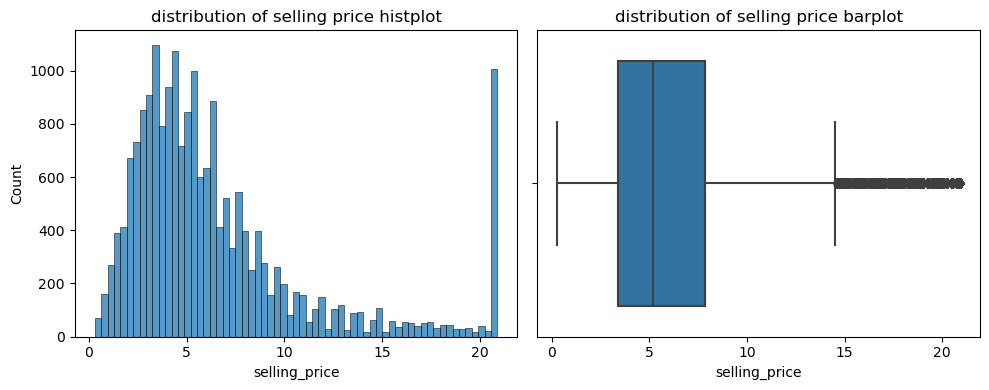

In [4]:
plt.figure(figsize=(10, 4), tight_layout= True)

plt.subplot(1, 2, 1)
plt.title("distribution of selling price histplot")
sns.histplot(x='selling_price', data=df)

plt.subplot(1, 2, 2)
plt.title("distribution of selling price barplot")
sns.boxplot(x='selling_price', data=df)

* observations :  
    - selling price is right skewed (visible in both histogram as well as boxplot)
    - selling price of most of the cars lies around 5, some with in range of 10 to 20 and there are peaks at the end ?

### Treat categorical variable into numberical

In [5]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)

* there are lot of unique models so we cannot apply One hot encoding as it will increse more number of dimentions
* Label Encoding also can not be applying as there is no ordering associated
* Hence we apply target encoding to it

### make

<Axes: title={'center': 'make before target encoding'}, xlabel='make'>

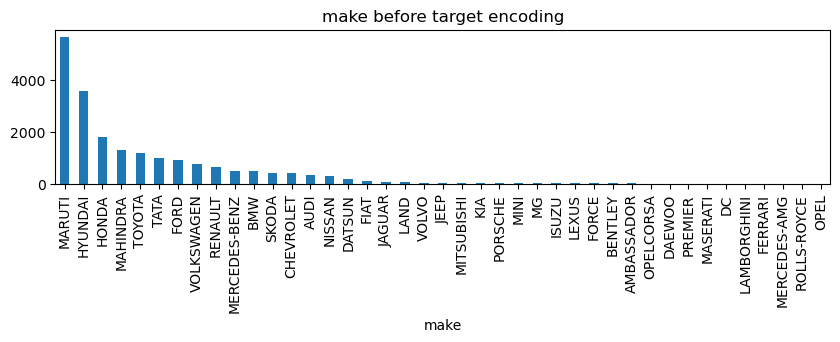

In [6]:
plt.figure(figsize=(10,2))
plt.title("make before target encoding")
df['make'].value_counts().plot(kind='bar')

In [7]:
df['make'] = np.round(df.groupby('make')['selling_price'].transform('mean'), 2)

<Axes: title={'center': 'make after target encoding'}, xlabel='make'>

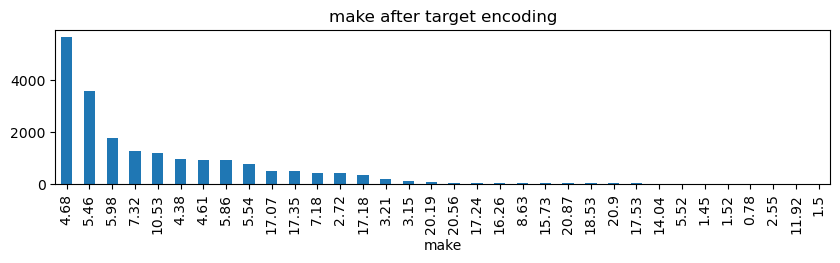

In [8]:
plt.figure(figsize=(10,2))
plt.title("make after target encoding")
df['make'].value_counts().plot(kind='bar')

**Note**
* Here Mean value of selling price is replaced for each make
* example for Maruti - 4.68
* shape of data looks same :) so target encoding is successful

### model

In [9]:
df['model'].nunique()

3233

<Axes: title={'center': 'model before target encoding - first 30 models as there are lot of models '}, xlabel='model'>

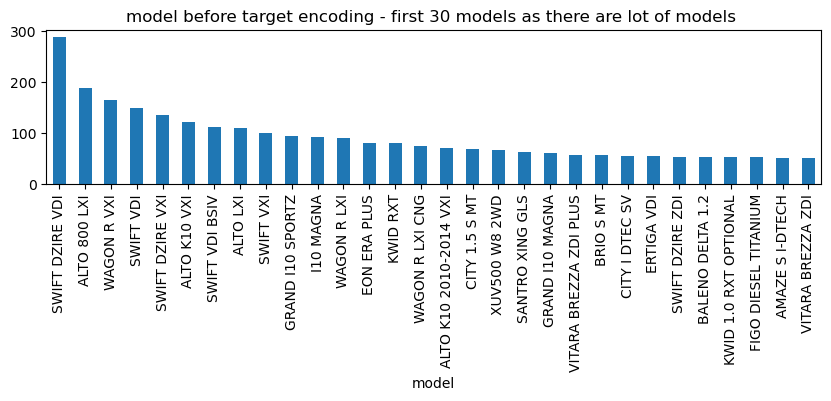

In [10]:
plt.figure(figsize=(10,2))
plt.title("model before target encoding - first 30 models as there are lot of models ")
df['model'].value_counts()[:30].plot(kind='bar')


In [11]:
df.groupby('model')['selling_price'].transform('mean')

0         1.180000
1         4.818750
2         3.394000
3         2.242676
4         6.777576
           ...    
19815     7.075000
19816     7.128571
19817     4.454000
19818     8.096522
19819    11.014286
Name: selling_price, Length: 19820, dtype: float64

In [12]:
df['model'] = np.round(df.groupby('model')['selling_price'].transform('mean'), 2)


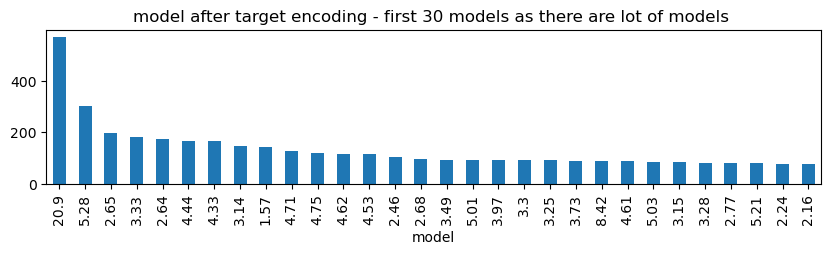

In [13]:
plt.figure(figsize=(10,2))
plt.title("model after target encoding - first 30 models as there are lot of models ")
df['model'].value_counts().head(30).plot(kind='bar')
plt.show()

## So data looks like now 

In [15]:
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,4.68,1.18,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,5.46,4.82,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,5.46,3.39,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,4.68,2.24,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,5.86,6.78,0,0,1,0,0,0,1,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   km_driven         19820 non-null  int64  
 2   mileage           19820 non-null  float64
 3   engine            19820 non-null  float64
 4   max_power         19820 non-null  float64
 5   age               19820 non-null  float64
 6   make              19820 non-null  float64
 7   model             19820 non-null  float64
 8   Individual        19820 non-null  int64  
 9   Trustmark Dealer  19820 non-null  int64  
 10  Diesel            19820 non-null  int64  
 11  Electric          19820 non-null  int64  
 12  LPG               19820 non-null  int64  
 13  Petrol            19820 non-null  int64  
 14  Manual            19820 non-null  int64  
 15  5                 19820 non-null  int64  
 16  >5                19820 non-null  int64 

**Hence no categorical data now**